<a href="https://colab.research.google.com/github/innsvi/python_for_ds_task/blob/main/HW_16_1_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D1%83%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BE%D1%80%D0%B5%D0%BD%D0%B4%D0%BD%D0%BE%D1%97_%D0%BF%D0%BB%D0%B0%D1%82%D0%B8_%D0%B7%D0%B0_%D0%B6%D0%B8%D1%82%D0%BB%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
# Cпочатку завантажимо всі необхідні в роботі бібліотеки:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ЗАВДАННЯ 1.1: Завантажте дані з файлу House_Rent_Dataset.csv

df = pd.read_csv('/content/drive/MyDrive/data/House_Rent_Dataset.csv')

In [4]:
# ЗАВДАННЯ 1.2: Виведіть розмір датасету

df.shape

(4746, 12)

In [5]:
# ЗАВДАННЯ 1.3: Покажіть перші 5 рядків

df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
# ЗАВДАННЯ 1.4:  Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Бачимо, що хоч датасет і великий, але пропусків в ньому немає, що полегшує нам задачу.

In [11]:
# ше раз додатково переконаємось, що немає пропусків чи дублікатів в даних

print(df.isnull().sum())
print(df.duplicated().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64
0


## Завдання 2: Дослідницький аналіз даних (EDA) (5 балів)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [12]:
# ЗАВДАННЯ 2.1: Аналіз пропущених значень. Перевірте наявність і відсоток пропущених значень у кожній колонці

# кількість пропущених значень у кожній колонці
missing_values = df.isnull().sum()

# відсоток пропущених значень
missing_percentage = (df.isnull().sum() / len(df)) * 100

# зробимо одну таблицю для наочності
missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
})

missing_df



,Missing Values,Percentage (%)
Posted On,0,0.0
BHK,0,0.0
Rent,0,0.0
Size,0,0.0
Floor,0,0.0
Area Type,0,0.0
Area Locality,0,0.0
City,0,0.0
Furnishing Status,0,0.0
Tenant Preferred,0,0.0


In [13]:
# ЗАВДАННЯ 2.2: Базова статистика. Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.

# Вибираємо числові змінні
numeric_cols = df.select_dtypes(include=["int64", "float64"])

# Базова статистика
numeric_stats = numeric_cols.describe()

numeric_stats


,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


ВИСНОВОК по 2.2: Аналіз базової статистики показав, що числові змінні мають різні масштаби значень. Змінні BHK та Bathroom мають логічний та обмежений діапазон. Натомість змінна Size демонструє значний розкид значень, зокрема наявність дуже великих площ, що може свідчити про окремі великі об’єкти нерухомості.

Змінна Rent має суттєву правосторонню асиметрію: середнє значення значно перевищує медіану, а максимальне значення суттєво відрізняється від верхнього квартиля. Це свідчить про наявність дорогих об’єктів, які можуть виступати викидами та впливати на результати регресійної моделі.

Загалом, перед побудовою моделі варто враховувати можливий вплив викидів та асиметрії розподілу цільової змінної.

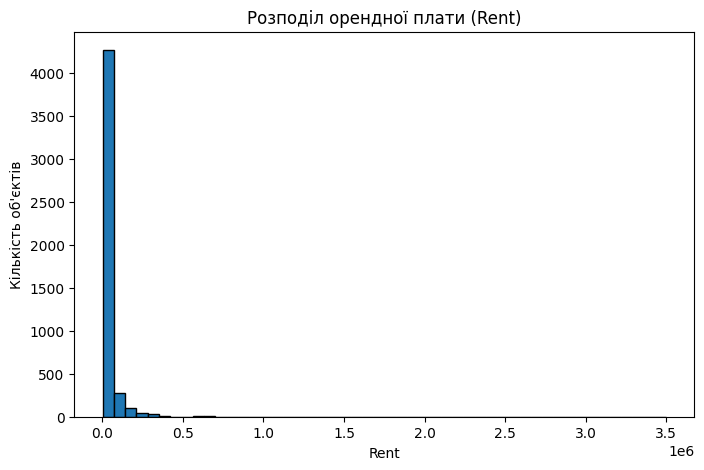

In [15]:
# ЗАВДАННЯ 2.3: Аналіз цільової змінної. Побудуйте гістограму розподілу цільової змінної (Rent)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Rent"], bins=50, edgecolor="black")
plt.title("Розподіл орендної плати (Rent)")
plt.xlabel("Rent")
plt.ylabel("Кількість об'єктів")
plt.show()


ВИСНОВОК по ГІСТОГРАМІ: Гістограма показує сильну правосторонню асиметрію та наявність викидів. Більшість об’єктів зосереджені в нижньому ціновому діапазоні, а невелика кількість дуже дорогих квартир формує довгий правий хвіст. Розподіл не є нормальним.

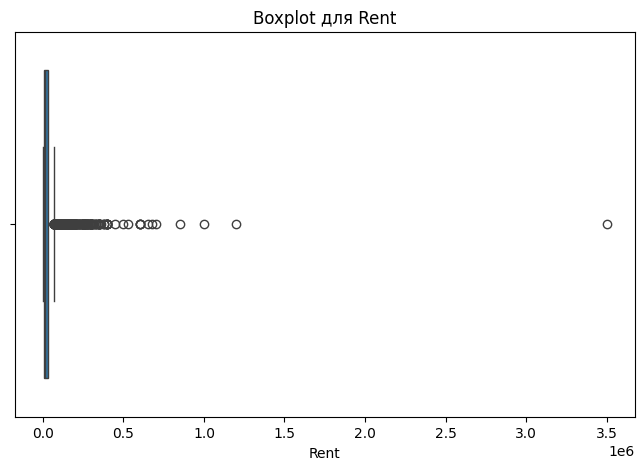

In [20]:
# ЗАВДАННЯ 2.4: Робота з викидами. Знайдіть та видаліть викиди в цільовій змінній (якщо є).
# Визначити викиди можна будь-яким зрозумілим для вас способом


# Спочатку переглянемо боксплот ДО роботи з викидами

import seaborn as sns


plt.figure(figsize=(8,5))
sns.boxplot(x=df["Rent"])
plt.title("Boxplot для Rent")
plt.show()


In [21]:
# обчислюємо квартилі
Q1 = df["Rent"].quantile(0.25)
Q3 = df["Rent"].quantile(0.75)

# міжквартильний розмах
IQR = Q3 - Q1

# межі для викидів
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Нижня межа:", lower_bound)
print("Верхня межа:", upper_bound)


Q1: 10000.0
Q3: 33000.0
IQR: 23000.0
Нижня межа: -24500.0
Верхня межа: 67500.0


In [22]:
outliers = df[(df["Rent"] < lower_bound) | (df["Rent"] > upper_bound)]

print("Кількість викидів:", outliers.shape[0])


Кількість викидів: 520


In [23]:
df_clean = df[(df["Rent"] >= lower_bound) & (df["Rent"] <= upper_bound)]

print("Розмір датасету до очищення:", df.shape[0])
print("Розмір датасету після очищення:", df_clean.shape[0])


Розмір датасету до очищення: 4746
Розмір датасету після очищення: 4226


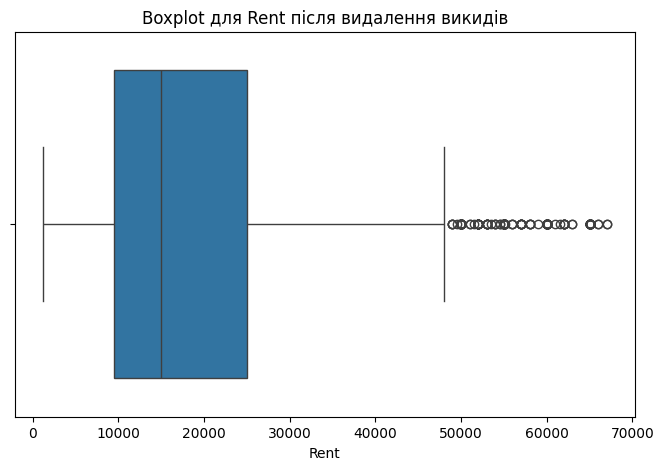

In [24]:
# Подивимось на боксплот після очищення

plt.figure(figsize=(8,5))
sns.boxplot(x=df_clean["Rent"])
plt.title("Boxplot для Rent після видалення викидів")
plt.show()


ВИСНОВОК 2.4: Після аналізу та видалення викидів у змінній Rent розподіл орендної плати став більш стабільним і реалістичним. До очищення дані містили дуже великі екстремальні значення, які суттєво спотворювали масштаб та могли негативно вплинути на побудову моделі регресії.

Після застосування методу IQR було видалено 520 аномальних спостережень, і розподіл став більш концентрованим навколо типових значень ринку.

In [26]:
# ЗАВДАННЯ 2.5: Аналіз категоріальних змінних. Виведіть кількість унікальних значень для кожної з категоріальних колонок.

# знайдемо всі категоріальні колонки
categorical_columns = df_clean.select_dtypes(include='object').columns

print("Кількість унікальних значень у категоріальних колонках:")
print("="*60)

for col in categorical_columns:
    unique_count = df_clean[col].nunique()
    print(f"{col}: {unique_count} унікальних значень")



Кількість унікальних значень у категоріальних колонках:
Posted On: 80 унікальних значень
Floor: 340 унікальних значень
Area Type: 3 унікальних значень
Area Locality: 1997 унікальних значень
City: 6 унікальних значень
Furnishing Status: 3 унікальних значень
Tenant Preferred: 3 унікальних значень
Point of Contact: 3 унікальних значень


Для лінійної регресії найкращі категоріальні ознаки:

- Area Type
- City
- Furnishing Status
- Tenant Preferred


## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [27]:
# ЗАВДАННЯ 3.1: Обчисліть матрицю кореляцій для числових змінних

# обираємо тільки числові змінні
numerical_df = df_clean.select_dtypes(include=['int64', 'float64'])

# обчислюємо кореляційну матрицю
correlation_matrix = numerical_df.corr()

correlation_matrix



,BHK,Rent,Size,Bathroom
BHK,1.000000,0.401268,0.698453,0.747918
Rent,0.401268,1.000000,0.393605,0.506528
Size,0.698453,0.393605,1.000000,0.680607
Bathroom,0.747918,0.506528,0.680607,1.000000


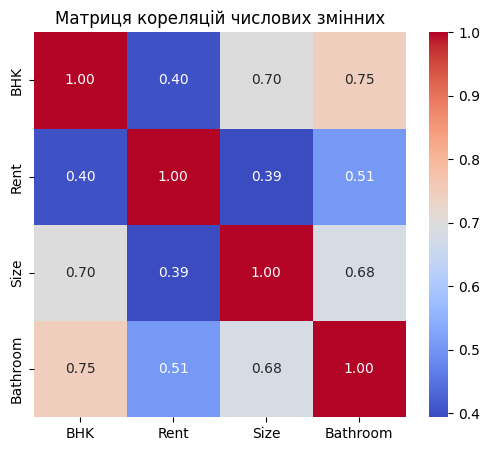

In [29]:
#  ЗАВДАННЯ 3.2:Візуалізуйте кореляційну матрицю за допомогою heatmap

plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f")

plt.title("Матриця кореляцій числових змінних")
plt.show()

ВИСНОВОК по 3.2: Цільова змінна (Rent) має помірний позитивний зв’язок з:
- кількістю ванних
- кількістю кімнат
- площею

Також між ознаками є сильна кореляція, що може вплинути на регресію.

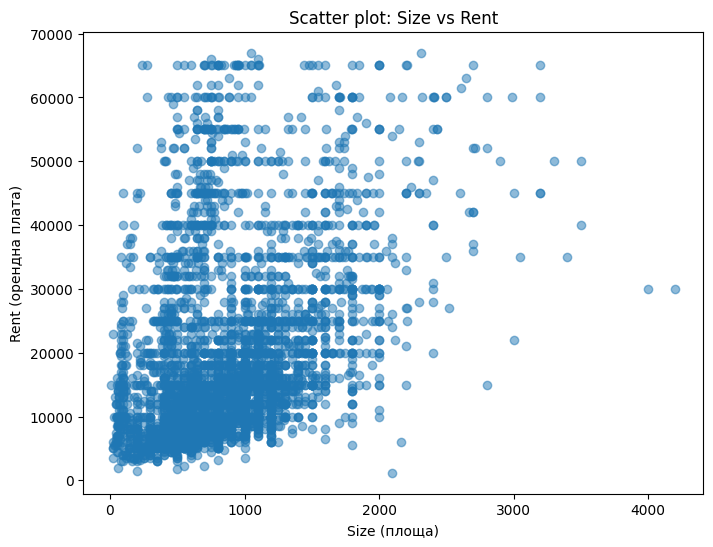

In [30]:
# ЗАВДАННЯ 3.3:Побудуйте scatter plot між Size та Rent


plt.figure(figsize=(8,6))

plt.scatter(df_clean['Size'], df_clean['Rent'], alpha=0.5)

plt.xlabel("Size (площа)")
plt.ylabel("Rent (орендна плата)")
plt.title("Scatter plot: Size vs Rent")

plt.show()


ВИСНОВОК по 3.3: Scatter plot демонструє позитивний зв’язок між площею житла та орендною платою. Із зростанням площі в середньому зростає орендна плата, однак розкид значень є значним, що свідчить про помірну силу зв’язку та вплив інших факторів. Але звязок ПОМІРНИЙ.

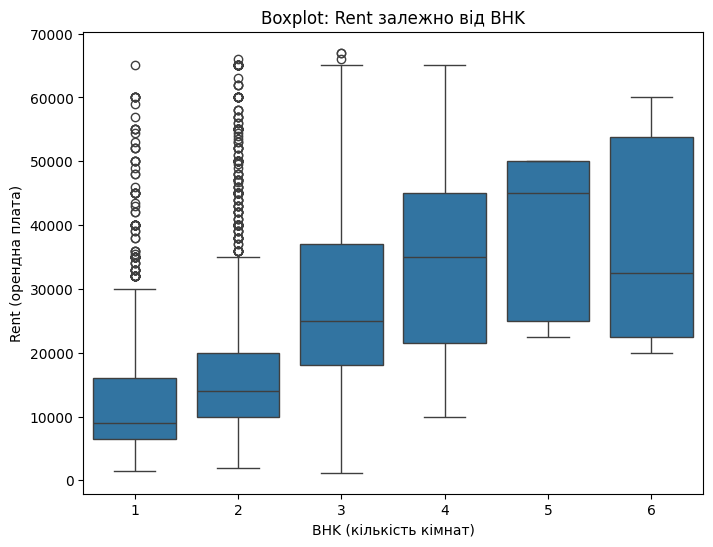

In [31]:
# ЗАВДАННЯ 3.4:Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)

plt.figure(figsize=(8,6))

sns.boxplot(x='BHK', y='Rent', data=df_clean)

plt.title("Boxplot: Rent залежно від BHK")
plt.xlabel("BHK (кількість кімнат)")
plt.ylabel("Rent (орендна плата)")

plt.show()

ВИСНОВОК 3.4: Орендна плата зростає разом із кількістю кімнат. Медіана Rent поступово збільшується від 1 до 6 BHK. Водночас між категоріями існує перекриття, що свідчить про вплив інших факторів (локація, площа, тип житла). Таким чином, BHK є важливою, але не єдиною змінною, що визначає орендну плату.

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [32]:
# ЗАВДАННЯ 4.1: Закодуйте категоріальні змінні за допомогою One-Hot Encoding.

# для One-Hot беремо “малокардинальні” колонки: City (6), Area Type (3), Furnishing Status (3), Tenant Preferred (3), Point of Contact (3)

# cписок категоріальних колонок, які будемо кодувати (мало унікальних)
cat_cols_small = ['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

# one-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=cat_cols_small, drop_first=True)

print("Розмір до кодування:", df_clean.shape)
print("Розмір після кодування:", df_encoded.shape)

df_encoded.head()

Розмір до кодування: (4226, 12)
Розмір після кодування: (4226, 20)


,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Area Type_Carpet Area,Area Type_Super Area,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2,False,False,False,True,False,False,True,False,True,True,False,False,True
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,False,False,False,True,False,False,True,True,False,True,False,False,True
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1,False,False,False,True,False,False,True,True,False,True,False,False,True
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1,False,False,False,True,False,False,True,False,True,True,False,False,True
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1,False,False,False,True,False,True,False,False,True,False,False,False,True


In [33]:
# Видаляємо колонки, які не будемо використовувати
df_model = df_encoded.drop(columns=['Area Locality', 'Floor', 'Posted On'])

print("Розмір датасету для моделі:", df_model.shape)
df_model.head()


Розмір датасету для моделі: (4226, 17)


,BHK,Rent,Size,Bathroom,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Area Type_Carpet Area,Area Type_Super Area,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,False,True,False,False,True,False,True,True,False,False,True
1,2,20000,800,1,False,False,False,True,False,False,True,True,False,True,False,False,True
2,2,17000,1000,1,False,False,False,True,False,False,True,True,False,True,False,False,True
3,2,10000,800,1,False,False,False,True,False,False,True,False,True,True,False,False,True
4,2,7500,850,1,False,False,False,True,False,True,False,False,True,False,False,False,True


In [34]:
# ЗАВДАННЯ 4.2: Опціонально (по 0.5 бала за кожну доцільну ознаку):
# Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі

# Можемо додати: ціна за квадратний метр (Rent_per_sqft) -ця змінна показує “дороговизну” району

# Можемо додати: Відношення ванних до кімнат - квартира з 3 кімнатами і 3 ванними дорожча, ніж 3 кімнати і 1 ванна.

# Можемо додати: Площа на одну кімнату - показує “просторість”.

# 1. Ціна за квадратний метр
df_model['Rent_per_sqft'] = df_model['Rent'] / df_model['Size']

# 2. Ванні на кімнату
df_model['Bathroom_per_room'] = df_model['Bathroom'] / df_model['BHK']

# 3. Площа на кімнату
df_model['Size_per_room'] = df_model['Size'] / df_model['BHK']

print("Новий розмір датасету:", df_model.shape)
df_model.head()


Новий розмір датасету: (4226, 20)


,BHK,Rent,Size,Bathroom,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Area Type_Carpet Area,Area Type_Super Area,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Rent_per_sqft,Bathroom_per_room,Size_per_room
0,2,10000,1100,2,False,False,False,True,False,False,True,False,True,True,False,False,True,9.090909,1.0,550.0
1,2,20000,800,1,False,False,False,True,False,False,True,True,False,True,False,False,True,25.000000,0.5,400.0
2,2,17000,1000,1,False,False,False,True,False,False,True,True,False,True,False,False,True,17.000000,0.5,500.0
3,2,10000,800,1,False,False,False,True,False,False,True,False,True,True,False,False,True,12.500000,0.5,400.0
4,2,7500,850,1,False,False,False,True,False,True,False,False,True,False,False,False,True,8.823529,0.5,425.0


In [39]:
#  ЗАВДАННЯ 4.3:Виберіть ознаки для побудови моделі (виключіть непотрібні колонки).
# Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.

# Видаляємо непотрібні колонки
df_model = df_model.drop(columns=['Area Locality', 'Floor', 'Posted On'], errors='ignore')

df_model = df_model.drop(columns=['Rent_per_sqft'])

print(df_model.columns)



Index(['BHK', 'Rent', 'Size', 'Bathroom', 'City_Chennai', 'City_Delhi',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Area Type_Carpet Area', 'Area Type_Super Area',
       'Furnishing Status_Semi-Furnished', 'Furnishing Status_Unfurnished',
       'Tenant Preferred_Bachelors/Family', 'Tenant Preferred_Family',
       'Point of Contact_Contact Builder', 'Point of Contact_Contact Owner',
       'Bathroom_per_room', 'Size_per_room'],
      dtype='object')


In [41]:
# ЗАВДАННЯ 4.4:Розділіть дані на ознаки (X) та цільову змінну (y)

# цільова змінна
y = df_model['Rent']

# ознаки (всі колонки крім Rent)
X = df_model.drop(columns=['Rent'])

print("Розмір X:", X.shape)
print("Розмір y:", y.shape)

# Перевірка
print("Чи є Rent в X?", 'Rent' in X.columns)


Розмір X: (4226, 18)
Розмір y: (4226,)
Чи є Rent в X? False


In [42]:
from sklearn.model_selection import train_test_split

# розділяємо дані: 80%  train, 20%  test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% у test
    random_state=42     # фіксуємо випадковість для відтворюваності
)

print("Розмір X_train:", X_train.shape)
print("Розмір X_test:", X_test.shape)
print("Розмір y_train:", y_train.shape)
print("Розмір y_test:", y_test.shape)


Розмір X_train: (3380, 18)
Розмір X_test: (846, 18)
Розмір y_train: (3380,)
Розмір y_test: (846,)


In [43]:
# ЗАВДАННЯ 4.5:Застосуйте стандартизацію до числових ознак

from sklearn.preprocessing import StandardScaler

# обираємо числові колонки
numeric_cols = ['BHK', 'Size', 'Bathroom', 'Bathroom_per_room', 'Size_per_room']

# створюємо scaler
scaler = StandardScaler()

# навчаємо scaler тільки на train
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# хастосовуємо до test
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Стандартизацію виконано.")


Стандартизацію виконано.


## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [44]:
# ЗАВДАННЯ 5.1: Розділіть дані на навчальну (80%) та тестову (20%) вибірки.

# ВИКОНАНО вище

In [45]:
# ЗАВДАННЯ 5.2: Створіть модель лінійної регресії.
# ЗАВДАННЯ 5.3: Навчіть модель на навчальних даних.

from sklearn.linear_model import LinearRegression

# 1️⃣ Створюємо модель
model = LinearRegression()

# 2️⃣ Навчаємо її на train-даних
model.fit(X_train, y_train)

print("Модель створена та навчена успішно.")


Модель створена та навчена успішно.


In [48]:
# ЗАВДАННЯ 5.4:Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients




,Feature,Coefficient
0,BHK,688.717800
1,Size,3109.997878
2,Bathroom,4232.057780
3,City_Chennai,-1180.530062
4,City_Delhi,2084.903508
5,City_Hyderabad,-2374.204187
6,City_Kolkata,-3007.615549
7,City_Mumbai,19187.283637
8,Area Type_Carpet Area,-2387.885947
9,Area Type_Super Area,-2601.363188


In [49]:

coefficients_sorted = coefficients.reindex(
    coefficients['Coefficient'].abs().sort_values(ascending=False).index
)

coefficients_sorted

,Feature,Coefficient
7,City_Mumbai,19187.283637
15,Point of Contact_Contact Owner,-8737.557782
14,Point of Contact_Contact Builder,-5674.656990
11,Furnishing Status_Unfurnished,-4598.738633
2,Bathroom,4232.057780
10,Furnishing Status_Semi-Furnished,-3438.471177
1,Size,3109.997878
6,City_Kolkata,-3007.615549
9,Area Type_Super Area,-2601.363188
8,Area Type_Carpet Area,-2387.885947


ВИСНОВОК по 5.4: **Ознака City_Mumbai** має найбільший позитивний вплив на прогноз орендної плати: якщо квартира знаходиться в Mumbai, її очікувана вартість зростає приблизно на 19 тис. (за інших рівних умов). Це свідчить про сильний вплив локації на формування ціни. **Ознака Size** також має позитивний коефіцієнт: зі збільшенням площі орендна плата зростає, що є логічним — більші квартири зазвичай дорожчі. Натомість **Point of Contact_Contact Owner** має від’ємний коефіцієнт, тобто якщо контакт здійснюється безпосередньо через власника, орендна плата в середньому нижча, ймовірно через відсутність посередницьких комісій. **Ознака Furnishing Status_Unfurnished** також має негативний вплив: квартири без меблів здаються дешевше порівняно з базовою категорією (повністю мебльованими), що відповідає ринковій логіці.

In [51]:
# ЗАВДАННЯ 5.5:Зробіть прогнози на тренувальній та тестовій вибірках.

# прогнози
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# порівняння перших 10 прогнозів тестової вибірки
comparison = pd.DataFrame({
    'Реальна оренда': y_test.values[:10],
    'Прогнозована оренда': y_test_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_test_pred[:10]).round(0)
})

print("Приклади прогнозів на тестовій вибірці:")
print(comparison)



Приклади прогнозів на тестовій вибірці:
   Реальна оренда  Прогнозована оренда  Помилка
0           22000              27170.0  -5170.0
1            5000               3150.0   1850.0
2           37000              40555.0  -3555.0
3            8000               2918.0   5082.0
4           15000              15529.0   -529.0
5           20000              23349.0  -3349.0
6            8500              18002.0  -9502.0
7            7000               4406.0   2594.0
8            3000               -119.0   3119.0
9            8000               6126.0   1874.0


За результатами прогнозів на тестовій вибірці видно, що модель лінійної регресії загалом вловлює приблизний рівень орендної плати, однак допускає досить суттєві помилки для окремих об’єктів. У деяких випадках різниця між реальною та прогнозованою ціною становить кілька тисяч, а іноді модель навіть прогнозує нереалістично низькі або від’ємні значення, що свідчить про обмеження простої лінійної моделі.

## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [52]:
# ЗАВДАННЯ 6.1: Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- TRAIN ---
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# --- TEST ---
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("ОЦІНКА ЯКОСТІ МОДЕЛІ")
print("====================================")

print("TRAIN:")
print("MAE:", round(mae_train, 2))
print("RMSE:", round(rmse_train, 2))
print("R²:", round(r2_train, 4))

print("\nTEST:")
print("MAE:", round(mae_test, 2))
print("RMSE:", round(rmse_test, 2))
print("R²:", round(r2_test, 4))



ОЦІНКА ЯКОСТІ МОДЕЛІ
TRAIN:
MAE: 5535.01
RMSE: 7661.79
R²: 0.6925

TEST:
MAE: 5544.12
RMSE: 7726.57
R²: 0.6886


**ЗАВДАННЯ 6.2: Порівняйте метрики та зробіть висновок про якість моделі**

**MAE ≈ 5500**
Тобто модель в середньому помиляється приблизно на 5500. Якщо середня оренда ≈ 35 000, то похибка ~15%. *Це помірна, але прийнятна точність*.

**RMSE ≈ 7700**
RMSE трохи більший за MAE — це нормально.
Це означає, що є кілька більших помилок, які збільшують середнє квадратичне відхилення.

**R2 ≈ 0.69**
Модель пояснює приблизно 69% варіації орендної плати. Це не ідеально але досить хороший результат для простої лінійної регресії.

*Модель демонструє стабільну якість прогнозування як на навчальній, так і на тестовій вибірках. Значення MAE та RMSE є майже однаковими для обох вибірок, що свідчить про узгоджену роботу моделі. Коефіцієнт детермінації R² близький до 0.69 означає, що модель пояснює приблизно 69% варіації орендної плати, що можна вважати хорошим результатом для базової лінійної регресії.*

**ЗАВДАННЯ 6.3: Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (Нагадування: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)**

Перенавчання не бачимо, бо:
- метрики майже однакові
- R2 майже не змінюється
- модель не "просідає" на тесті

Якби було перенавчання:
- TRAIN R2 = 0.90
- TEST R2 = 0.40

Недонавчання теж немає, бо R2 = 0.69 — це не слабкий результат модель пояснює більшу частину залежності.

*Ознак перенавчання або недонавчання не виявлено. Метрики на навчальній та тестовій вибірках майже однакові, що свідчить про хорошу здатність моделі до узагальнення. Модель не демонструє значного погіршення якості на тестових даних, отже вона не є перенавченою. Водночас показник R2 близький до 0.69 свідчить про достатній рівень пояснювальної здатності, тому ознак недонавчання також не спостерігається.*

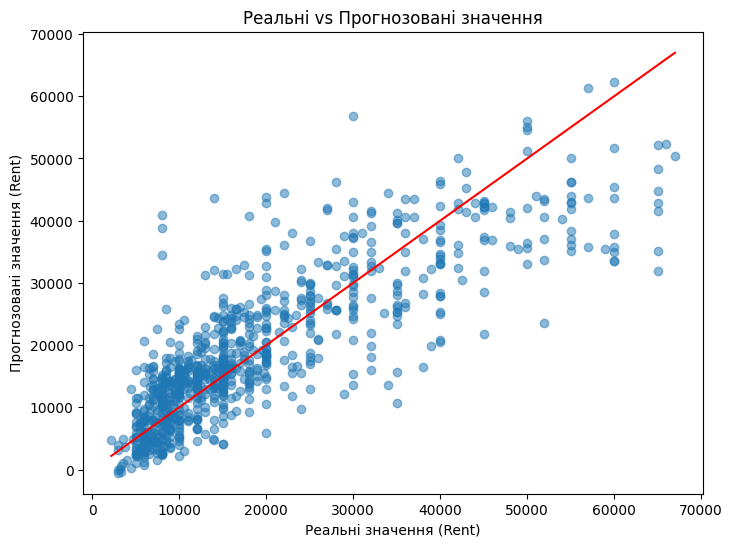

In [53]:
#ЗАВДАННЯ 6.4: Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі

plt.figure(figsize=(8,6))

# точки
plt.scatter(y_test, y_test_pred, alpha=0.5)

# дінія ідеального прогнозу
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Реальні значення (Rent)")
plt.ylabel("Прогнозовані значення (Rent)")
plt.title("Реальні vs Прогнозовані значення")

plt.show()


**ВИСНОВОК 6.4**: Модель демонструє помірну якість прогнозування. Точки на графіку розташовані уздовж діагональної лінії, що свідчить про наявність лінійного зв’язку між реальними та прогнозованими значеннями. Водночас спостерігається розкид точок, особливо для дорогих об’єктів, що вказує на заниження прогнозів для високих значень орендної плати. Загалом модель адекватно відображає тренд, але має похибку, що узгоджується зі значенням R2 ≈ 0.69.

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

In [54]:
# ЗАВДАННЯ 7.1: Обчисліть помилки (residuals = реальні - прогнозовані значення)

# обчислюємо залишки для тестової вибірки
residuals = y_test - y_test_pred

# подивимось перші 10 значень
print("Перші 10 залишків:")
print(residuals[:10])


Перші 10 залишків:
1998   -5169.587095
3190    1849.995468
2670   -3555.145804
4647    5082.131990
4488    -529.041126
2672   -3349.354378
2802   -9501.864463
352     2593.738291
221     3119.387361
491     1874.306522
Name: Rent, dtype: float64


Помилки є як позитивні, так і негативні
(модель не системно завищує або занижує)

Є досить великі помилки (9000–10000) → це нормально для задачі з орендою

Помилки виражені в грошах  це зручно для інтерпретації

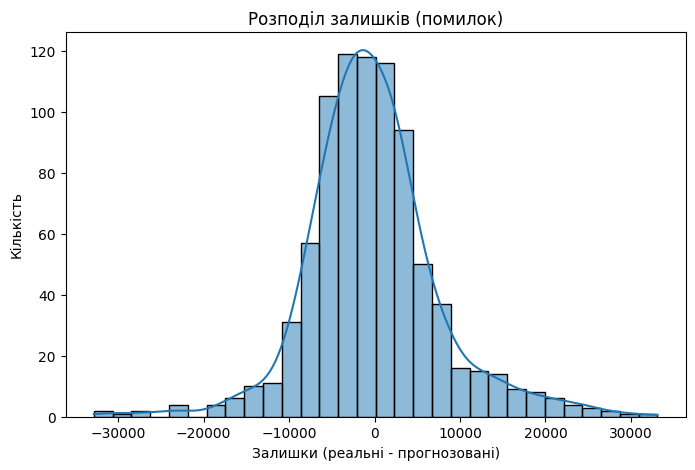

In [55]:
# ЗАВДАННЯ 7.2: Побудуйте гістограму розподілу помилок

plt.figure(figsize=(8,5))

sns.histplot(residuals, bins=30, kde=True)

plt.title("Розподіл залишків (помилок)")
plt.xlabel("Залишки (реальні - прогнозовані)")
plt.ylabel("Кількість")
plt.show()


*Розподіл залишків є приблизно симетричним та центрованим навколо нуля, що свідчить про відсутність систематичного зміщення моделі. Форма розподілу близька до нормальної, що відповідає припущенням лінійної регресії. Водночас спостерігаються довгі хвости, що вказує на наявність значних помилок для окремих об’єктів, особливо з високою або нестандартною орендною платою.*

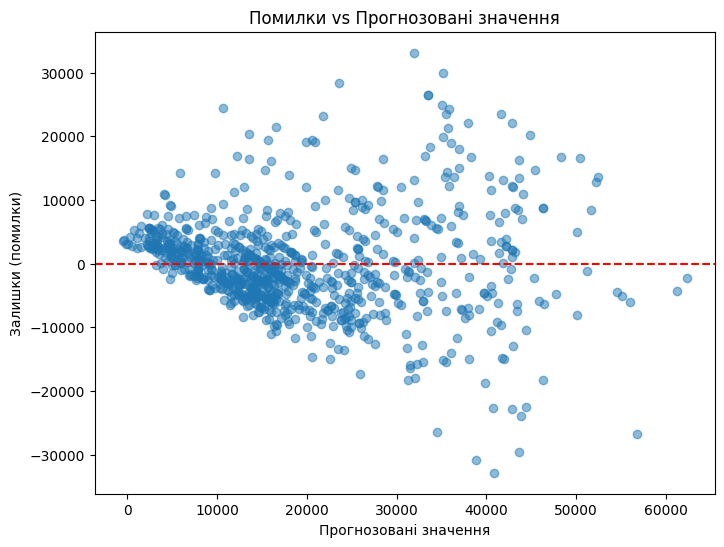

In [56]:
# ЗАВДАННЯ 7.3: Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?

# будуємо графік
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)

# горизонтальна лінія на рівні 0 (ідеальна помилка)
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Прогнозовані значення")
plt.ylabel("Залишки (помилки)")
plt.title("Помилки vs Прогнозовані значення")

plt.show()


*На графіку видно, що розкид залишків збільшується зі зростанням прогнозованої орендної плати. Це свідчить про наявність гетероскедастичності дисперсія помилки не є сталою. Модель точніше прогнозує об’єкти з низькою та середньою орендою, тоді як для дорогого житла похибка суттєво зростає.*

In [57]:
# ЗАВДАННЯ 7.4: Знайдіть 5 прогнозів з найбільшими помилками


# створюємо DataFrame для аналізу
errors_df = pd.DataFrame({
    'Реальна оренда': y_test.values,
    'Прогнозована оренда': y_test_pred,
    'Помилка': residuals
})

# додаємо абсолютну помилку
errors_df['Абсолютна помилка'] = errors_df['Помилка'].abs()

# сортуємо за абсолютною помилкою (від найбільшої)
top_5_errors = errors_df.sort_values(by='Абсолютна помилка', ascending=False).head(5)

print("5 прогнозів з найбільшими помилками:")
print(top_5_errors)


5 прогнозів з найбільшими помилками:
      Реальна оренда  Прогнозована оренда       Помилка  Абсолютна помилка
3962           65000         31884.798937  33115.201063       33115.201063
549             8000         40853.140072 -32853.140072       32853.140072
904             8000         38889.191262 -30889.191262       30889.191262
3520           65000         35114.768260  29885.231740       29885.231740
598            14000         43648.666166 -29648.666166       29648.666166


*Аналіз 5 прогнозів з найбільшими помилками показав, що модель допускає значні відхилення, які сягають понад 30 000. Основна проблема спостерігається на крайніх значеннях орендної плати: для дуже дорогих об’єктів модель суттєво занижує прогноз, тоді як для дешевих квартир вона, навпаки, сильно завищує вартість. Це означає, що лінійна регресія добре працює в середньому діапазоні цін, але нестабільна для екстремальних значень. Така поведінка є типовою для простої лінійної моделі за наявності високої варіативності даних або нелінійних залежностей. Попри прийнятний рівень якості (R2 ≈ 0.69), модель потребує покращення, зокрема через можливе перетворення цільової змінної (наприклад, логарифмування) або використання більш складних алгоритмів.*

In [58]:
# ЗАВДАННЯ 7.5: Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.

test_analysis = X_test.copy()
test_analysis['Rent_real'] = y_test.values
test_analysis['Rent_pred'] = y_test_pred
test_analysis['Residual'] = y_test.values - y_test_pred
test_analysis['Abs_error'] = abs(test_analysis['Residual'])

# Середня абсолютна помилка по BHK
bhk_errors = test_analysis.groupby('BHK')['Abs_error'].mean().sort_values(ascending=False)

print("Середня абсолютна помилка по BHK:")
print(bhk_errors)


Середня абсолютна помилка по BHK:
BHK
 2.745863    11550.310238
 1.400788     7812.842850
 4.090938     6021.021706
 5.436014     5335.215606
 0.055713     5081.656965
-1.289362     4477.585712
Name: Abs_error, dtype: float64


In [59]:
# витягуємо назву міста з one-hot колонок
city_cols = [col for col in X_test.columns if col.startswith('City_')]

# визначаємо місто для кожного рядка
test_analysis['City'] = X_test[city_cols].idxmax(axis=1)

# середня абсолютна помилка по містах
city_errors = test_analysis.groupby('City')['Abs_error'].mean().sort_values(ascending=False)

print("Середня абсолютна помилка по містах:")
print(city_errors)


Середня абсолютна помилка по містах:
City
City_Mumbai       9112.033965
City_Delhi        7231.925473
City_Hyderabad    5211.691980
City_Chennai      4353.240421
City_Kolkata      4149.052266
Name: Abs_error, dtype: float64


Аналіз середньої абсолютної помилки показав, що модель найбільше помиляється для об’єктів з вищими значеннями BHK (приблизно 2.7 кімнати), де середня помилка перевищує 11 500. Це свідчить про те, що для більш просторого або нестандартного житла ціна формується складніше і лінійна модель не завжди точно її відображає. Для менших або більш типових значень BHK помилка значно менша (приблизно 4 500–6 000), що означає кращу стабільність моделі в масовому сегменті житла.

За містами найбільша середня помилка спостерігається у Mumbai (понад 9 100), далі Delhi (понад 7 200). Це може бути пов’язано з більшою варіативністю цін та складнішою структурою ринку в цих містах. У Chennai та Kolkata модель працює точніше (помилка близько 4 100–4 300), що говорить про більш передбачуваний ринок або кращу відповідність лінійної моделі цим даним.

Отже, модель найкраще прогнозує оренду для стандартних квартир у менш варіативних містах, а найбільші труднощі виникають у преміальному сегменті та в економічно активних містах, таких як Mumbai. *Курсив*

**ЗАВДАННЯ 7.6: Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо** :)

Для покращення якості моделі я б зробила кілька наступних кроків. По-перше, варто застосувати логарифмічне перетворення цільової змінної (log(Rent)), оскільки розподіл оренди є асиметричним і має довгий правий хвіст. Це може зменшити вплив великих значень та покращити точність прогнозів для дорогого житла.

По-друге, доцільно спробувати більш складні моделі, наприклад Ridge або Lasso регресію для зменшення впливу мультиколінеарності, а також ансамблеві методи (Random Forest, Gradient Boosting), які краще враховують нелінійні залежності та взаємодії між ознаками.

По-третє, можна додати нові інформативні ознаки: наприклад, взаємодії між Size та City, або між BHK та Furnishing Status. Також варто перевірити доцільність додавання більш детальної інформації про локацію (якщо агрегувати Area Locality у райони або групи).

Крім того, можна провести більш ретельну обробку викидів або використати робастні методи регресії, оскільки модель найбільше помиляється у дорогому сегменті та в Mumbai.

Загалом, головні напрями покращення - це врахування нелінійності, зменшення впливу екстремальних значень та інженерія нових ознак.

In [60]:
# СПРОБУЄМО логарифмування цільової змінної (log(Rent))

# створбємо лог

# створюємо нову цільову змінну
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)


In [61]:
# наічаємо модель на лог значеннях

model_log = LinearRegression()
model_log.fit(X_train, y_train_log)


LinearRegression()

In [62]:
# прогнози в лог-масштабі
y_train_pred_log = model_log.predict(X_train)
y_test_pred_log = model_log.predict(X_test)

# повертаємо в нормальний масштаб
y_train_pred_new = np.exp(y_train_pred_log)
y_test_pred_new = np.exp(y_test_pred_log)


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_new = mean_absolute_error(y_test, y_test_pred_new)
rmse_new = np.sqrt(mean_squared_error(y_test, y_test_pred_new))
r2_new = r2_score(y_test, y_test_pred_new)

print("MAE:", round(mae_new,2))
print("RMSE:", round(rmse_new,2))
print("R²:", round(r2_new,4))


MAE: 5383.87
RMSE: 8935.9
R²: 0.5836


MAE трохи зменшився: модель стала в середньому помилятись на ~160 менше.
Але це дуже невелике покращення.

RMSE сильно виріс: це означає, що великі помилки стали ще більшими.
А RMSE якраз сильно штрафує великі відхилення.

R2 впав з 0.69 до 0.58: це означає, що модель тепер пояснює лише 58% варіації замість 69%.

У нашому датасеті логарифмування не покращило модель. Хоча середня абсолютна помилка незначно зменшилась, показники RMSE та R2 погіршились. Це свідчить про те, що для даного набору даних лінійна регресія на початковій шкалі цільової змінної забезпечує кращу пояснювальну здатність.

**Експеримент не вдався** :(